In [2]:
# BASED ON RASCHKA (2015)

import os
import struct
import numpy as np
import pandas

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_array

import time
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
# OBTAIN

from sklearn.datasets import fetch_mldata


In [4]:
# OBTAIN - SCRUB  - CREATE TEST AND TRAIN

def load_data(dtype=np.float32, order='F'):
    data = fetch_mldata('MNIST original')
    X = check_array(data['data'], dtype=dtype, order=order)
    y = data["target"]

    # Normalize features
    X = X / 255

    # Create train-test split (as [Joachims, 2006])
    n_train = 60000
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]

    return X_train, X_test, y_train, y_test 

In [5]:
# OBTAIN - ASSIGN MNIST TO VARIABLES

X_train, X_test, y_train, y_test = load_data()

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


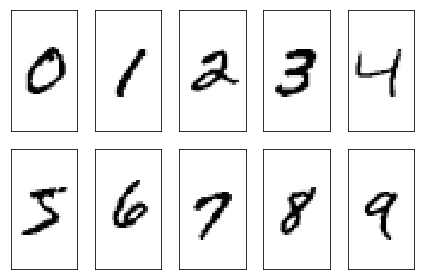

In [6]:
# EXPLORE - VISUALIZE DIGITS


fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

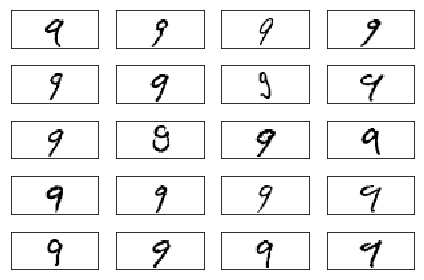

In [7]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 9

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_train[y_train == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_9.png', dpi=300)
plt.show()

In [8]:
# SCRUB - TRANSFORM TRAIN & TEST

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# MODEL - BUILD BASE MODEL FOR LOGISTIC REGRESSION

start = time.time() - # TRACK TIME

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train,y_test))

lr = LogisticRegression(solver = 'lbfgs')  # USING THE LIMITED MEMORY BROYDEN FLETCHER GOLDFARB SHANNO ALGORITHM - MORE INFO HERE - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

lr.fit(X_train_std, y_train)

#plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr,
#                      test_idx=range(105,150))
#plt.show()

score = lr.score(X_test_std, y_test)  # ACCURACY AGAINST THE TEST SET
print(score)

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

0.9174
276.95917320251465
